In [58]:
import pandas as pd
from os import listdir
from os.path import isfile, join
import matplotlib.pyplot as plt
import string


In [2]:
data_folder = 'billboard/data/years/'
example_file = '1999.json'


file_list = [f for f in listdir(data_folder) if isfile(join(data_folder, f)) and f.endswith('.json')]

dfs = [] # an empty list to store the data frames
for file in file_list:
    path = data_folder + file
    data = pd.read_json(path) # read data frame from json file
    dfs.append(data) # append the data frame to the list

music_data = pd.concat(dfs, ignore_index=True) # concatenate all the data frames in the list.

In [89]:
len(set([element for list_ in list(music_data.tags) for element in list_]))

966

In [3]:
music_data.head()

,lyrics,tags,num_syllables,pos,year,fog_index,flesch_index,num_words,num_lines,sentiment,title,f_k_grade,artist,difficult_words,num_dupes
0,"Mona Lisa, Mona Lisa, men have named you\nYou'...","[american, death by lung cancer, easy listenin...",189.0,2,1950,5.2,88.74,145,17,"{'neg': 0.155, 'neu': 0.646, 'pos': 0.199, 'co...",Mona Lisa,2.9,Nat King Cole,13,10
1,I wanna be Loved\nBy Andrews Sisters\n\nOooo-o...,[andrews sisters],270.9,17,1950,4.4,82.31,189,31,"{'neg': 0.036000000000000004, 'neu': 0.74, 'po...",I Wanna Be Loved,3.3,Andrews Sisters,40,32
2,I was dancing with my darling to the Tennessee...,"[country, pop]",174.6,18,1950,5.2,88.74,138,16,"{'neg': 0.053, 'neu': 0.596, 'pos': 0.35100000...",Tennessee Waltz,2.9,Patti Page,5,10
3,Each time I hold someone new\nMy arms grow col...,"[death by liver failure, spiritual]",135.9,20,1950,4.4,99.23,117,18,"{'neg': 0.167, 'neu': 0.602, 'pos': 0.231, 'co...",I'll Never Be Free,0.9,Tennessee Ernie Ford,10,3
4,"Unfortunately, we are not licensed to display ...","[country, pop]",46.8,21,1950,6.0,69.79,32,3,"{'neg': 0.07, 'neu': 0.85, 'pos': 0.079, 'comp...",All My Love,6.0,Patti Page,9,0


0.07428624627606753
0.15624280039721947
0.7694769116186693


Text(0.5, 0, 'Sentiment')

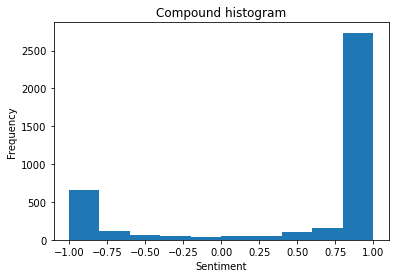

In [99]:
print(music_data.sentiment.map(lambda dic : dic['neg']).mean())
print(music_data.sentiment.map(lambda dic : dic['pos']).mean())
print(music_data.sentiment.map(lambda dic : dic['neu']).mean())
music_data.sentiment.map(lambda dic : dic['compound']).plot(kind='hist')
plt.title('Compound histogram')
plt.xlabel('Sentiment')

In [4]:
len(music_data)

4028

In [82]:
music_data.groupby('year')[['lyrics']].count().describe()

,lyrics
count,66.000000
mean,61.030303
std,20.331082
min,6.000000
25%,54.250000
50%,68.000000
75%,76.000000
max,82.000000


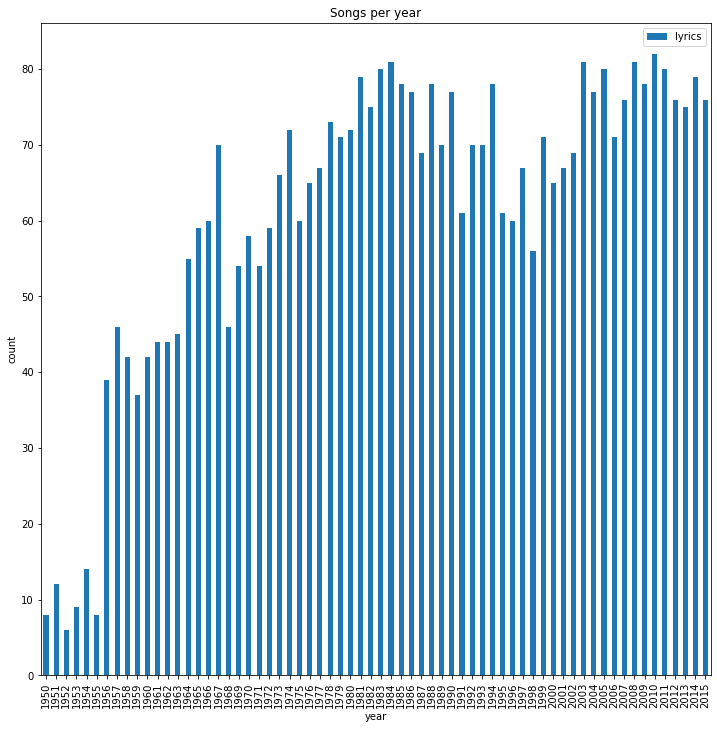

In [5]:
music_data.groupby('year')[['lyrics']].count().plot(kind = 'bar', figsize = (12,12), title='Songs per year')
plt.ylabel('count')
plt.xlabel('year')
plt.show()

In [7]:
print(f"There are {len(music_data['artist'].drop_duplicates())} artists.")

There are 1308 artists.


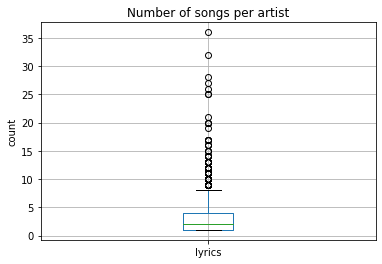

In [8]:
music_data.groupby('artist')[['lyrics']].count().boxplot()
plt.title('Number of songs per artist')
plt.ylabel('count')
#plt.yscale('log')
plt.show()

In [158]:
small_set_colors = set(['white', 'black', 'yellow', 'green', 'purple', 'brown', 'pink',
                  'red', 'blue', 'maroon', 'salmon', 'coral', 'orange', 'gold',
                  'silver', 'lime', 'turquoise', 'cyan', 'navy', 'indigo', 'magenta',
                  'beige', 'tan', 'grey'])

In [100]:
len(small_set_colors)

24

In [74]:
with open("colors.txt", "r") as file_colors:
    set_colors = set([line.strip() for line in file_colors])

In [101]:
len(set_colors)

229

In [159]:
music_data['intersection_colors_title'] = music_data['title'].str.lower().map(lambda title: set(title.translate(str.maketrans('', '', string.punctuation)).split()).intersection(small_set_colors))
music_data['intersection_colors_lyrics'] = music_data['lyrics'].str.lower().map(lambda lyrics: set(lyrics.translate(str.maketrans('', '', string.punctuation)).split()).intersection(small_set_colors))

In [160]:
len(music_data[music_data['intersection_colors_lyrics'] != set()])

780

In [161]:
colored_songs = music_data[music_data['intersection_colors_lyrics'] != set()]

In [162]:
color_counts = pd.DataFrame([color for colors_list in list(colored_songs['intersection_colors_lyrics'].map(lambda set_ : list(set_))) for color in colors_list], columns=['color']).reset_index().groupby('color').count()

In [164]:
color_counts = color_counts.rename(columns={'index' : 'count'})

<AxesSubplot:xlabel='color'>

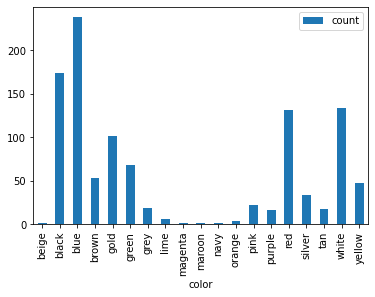

In [171]:
color_counts.plot(kind='bar')